In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

## 1. Make toy data using sklearn.make_moons

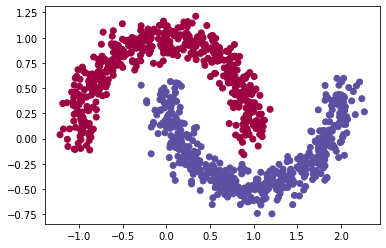

In [4]:
X, y = make_moons(n_samples=(500, 500), noise=0.1, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral);

## 2. Build and train a simple MLP model

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

log = model.fit(X, y, epochs=200, verbose=0)

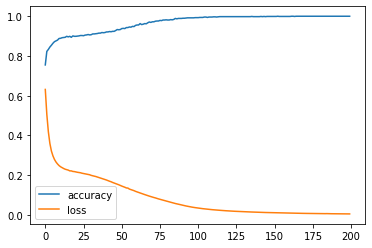

In [6]:
plt.plot(log.history['accuracy'], label='accuracy')
plt.plot(log.history['loss'], label='loss')
plt.legend()
plt.show();

## 3. Plot decision boundary

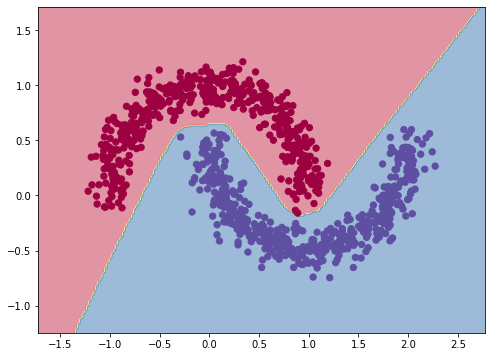

In [16]:
def show_boundary(X, y, model):
  x_min = X[:, 0].min() - 0.5, 
  x_max = X[:, 0].max() + 0.5
  y_min = X[:, 1].min() - 0.5
  y_max = X[:, 1].max() + 0.5

  # generate meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                       np.linspace(y_min, y_max, 200))
  X_mesh = np.c_[xx.ravel(), yy.ravel()]

  # predict on meshgrid points
  y_preds = model.predict(X_mesh)
  # convert to labels
  if y_preds.shape[1] > 1:
    y_preds = np.argmax(y_preds, axis=1)
  else:
    y_preds = np.round(y_preds)

  # reshape predictions for plotting
  y_preds = y_preds.reshape(xx.shape)

  # plot the decision boundary
  plt.figure(figsize=(8,6))

  cmap = plt.cm.Spectral
  plt.contourf(xx, yy, y_preds, cmap=cmap, alpha=.5)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


show_boundary(X, y, model)